# Übung 12: Parameterschätzung und Anwendung


## Aufgabe 1: Schätzen von Parametern

Wir betrachten den Datensatz `Unemployment`, welcher in dem Paket `Ecdat` enthalten ist. 

Führen Sie zunächst den Befehl `library(Ecdat)` aus, um das Paket zu laden.
Sollten Sie R nicht über Juypterhub nutzen, so müssen Sie `Ecdat` eventuell zuvor mit `install.packages("Ecdat")` installieren.

Wir interessieren wir uns für die Spalte `duration`, welche für die befragten Personen die Dauer der Arbeitslosigkeit (in Wochen) enthält.

### Aufagbe 1 a) Annahme: Daten sind normalverteilt

Wir nehmen an die Daten der Spalte `duration` stammen aus einer **Normalverteilung**.

- Schätzen Sie aus den Daten die Parameter $\mu$ und $\sigma^2$.  Nutzen Sie die erwartungstreuen Schätzfuntionen aus der Vorlesung.
- Berechnen Sie (mit Hilfe der Normalverteilung und den geschätzten Parametern) die Wahrscheinlichkeit, dass eine Person maximal 10 Wochen arbeitslos ist.


In [ ]:
# Platz zum Rechnen

### Aufgabe 1 b) Annahme: Daten sind stetig gleichverteilt

Wir nehmen an die Daten der Spalte `duration` stammen aus einer stetigen **Gleichverteilung** auf dem Intervall $[0,a]$.

- Schätzen Sie aus den Daten den Parameter $a$. Nutzen Sie die erwartungstreue Schätzfuntion aus der Vorlesung.
- Berechnen Sie (mit Hilfe der stetigen Geleichverteilung und dem geschätzten Parameter) die Wahrscheinlichkeit, dass eine Person maximal 10 Wochen arbeitslos ist.


In [ ]:
# Platz zum Rechnen

### Aufgabe 1 c) Annahme: Daten sind exponentialverteilt

Wir nehmen an die Daten der Spalte `duration` stammen aus einer **Exponentialverteilung**.

- Schätzen Sie aus den Daten den Parameter $\lambda$. Nutzen Sie die erwartungstreue Schätzfuntion aus der Vorlesung.
- Berechnen Sie (mit Hilfe der Exponentialverteilung und dem geschätzten Parameter) die Wahrscheinlichkeit, dass eine Person maximal 10 Wochen arbeitslos ist.

In [ ]:
# Platz zum Rechnen

Wie kommen die unterschiedlichen Ergebnisse zustande? Und was ist die richtige Annahme?

### Aufgabe 1 d): Plot der Verteilung der Daten und der theoretischen Verteilung

Um zu prüfen welche der Annahmen am ehesten passt plotten wir die Daten und dazu die theoretischen Verteilungen:

1. Erstellen Sie ein Histogramm der Daten mit der Option `breaks = 20`. Welcher Ihnen bekannten Dichte kommt diese Grafik am nächsten?
2. Plotten Sie das Histgromm nun mit der Option `probability=T`. Damit wird die $y$-Achse so skaliert, dass die Fläche einer jeden Säule gleich der relativen Häufigkeit der zugehörigen Klasse sind. Dies hat zur Folge, dass (wie bei einer Wahrscheinlichkeitsdichte) die Gesamtfläche des Histogramms genau 1 beträgt.
3. Erstellen Sie nun 3 Kurven der Dichten aus 1a), 1b) und 1c) mit den jeweils geschätzten Parametern und plotten Sie diese in die Grafik des Histogramms:

   - Erstellen Sie mit `x <- seq(min = ... , max = ... , length.out = ... )` einen Vektor, welcher den gesamten Wertebereich von `Unemployment$duration` abdeckt und mindestens 500 Elemente enthält.
   - Für jeden $x$-Wert soll mit `dnorm()`, `dunif()` bzw. `dexp()` der passende Wert der Dichtefuntion berechnet werden. Setzen Sie dazu den Vektor `x` in diese Funktionen ein. Wählen Sie die richtigen Parameter. Die Ausgabe speichern Sie als `y1`, `y2` und `y3` ab.
   - Nutzen Sie nun die Funktion `lines()` um Graphen der Dichten in das Histogramm einzuzeichnen. Verwenden Sie unterschiedliche Farben.



4. Welche der Dichten passt am besten zum Histogramm. Welchem der Ergebniss aus Aufgabe 1 vertrauen Sie also am ehesten?



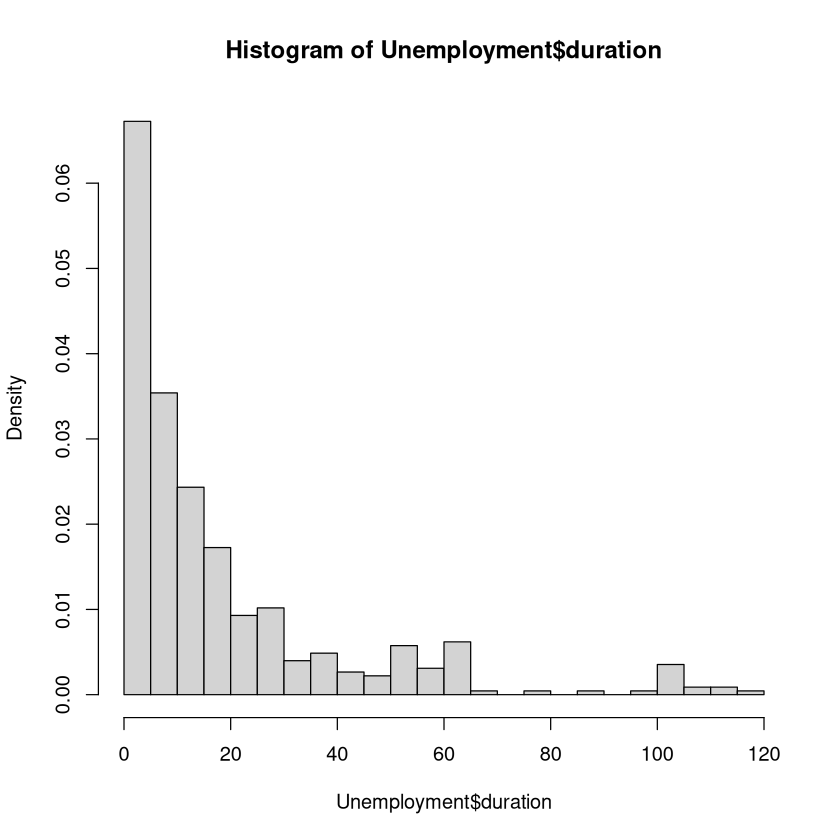

In [5]:
# Platz zum Rechnen

## Aufgabe 2: Simulation - erwartungstreu vs. nicht erwartungstreu

Haben Sie sich schon mal gefragt, warum wir für die Stichprobenvarianz die Formel $\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2$ und nicht $\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2$ nutzen? Wir teilen also durch $n-1$ statt durch $n$. Dies liegt daran, dass der erste Ausdruck einen **erwarungstreuen** Schätzer definiert, der zweite jedoch nicht. Was dies bedeutet soll hier mit einer Simulation verdeutlicht werden.

Lesen und verstehen Sie die folgenden Erklärungen und den zugehörigen Code. Führen Sie den Code aus und ändern Sie gern die Parameter um deren Auswirkungen auf die Simulation zu prüfen.

### Ziel: 
Du erzeugst viele unabhängige Stichproben aus einer Verteilung mit bekanntem $\sigma^2$. 
Für jede Stichprobe berechnest du zwei Varianzschätzer

$$
S=\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2 \qquad \text{und} \qquad T=\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2
$$

Dann vergleichst du die Durchschnittswerte dieser Schätzer über alle Wiederholungen mit der wahren Varianz $\sigma^2$. 
Der Schätzer welcher nicht erwartungstreu ist, wird einen systematischen Fehler (Bias) erkennen lassen.

### Vorbereitung:


Wir wählen eine Verteilung, deren wahre Varianz bekannt ist. Hier verwenden wir eine Normalverteilung mit $\mu=0$ und $\sigma^2=4$.
Dadurch können wir prüfen, ob der Mittelwert der Schätzer über viele Wiederholungen bei 4 landet (erwartungstreu) oder systematisch daneben (biased).



In [1]:
set.seed(321)          # für Reproduzierbarkeit 
mu <- 0                # EW auf 0 setzen
sigma2_true <- 4       # wahre Varianz (bekannt)
sigma_true <- sqrt(sigma2_true)

n <- 15                # Stichprobengröße (kann gern variiert werden, je größer desto näher sind die beiden Schätzer beieinadner)
B <- 5000              # Anzahl der Wiederholungen (je mehr, desto eindeutiger wird der)


Nun definieren wir Funktionen, welche die Schätzer berechnen.

In [2]:
var_n    <- function(x) { 
  sum((x - mean(x))^2) / length(x)        # entspricht Division durch n
}

var_n_1  <- function(x) { 
  sum((x - mean(x))^2) / (length(x) - 1)  # entspricht Division durch n-1
}


### Eine Stichprobe erzeugen und Werte vergleichen

Wir ziehen zunächst nur eine Stichprobe und vergleichen beide Varianzberechnungen. Die verdeutlicht noch nicht die Erwartungstreuer (dafür brauchen wir viele Wiederholungen), aber es macht sichtbar, dass die beiden Formeln unterschiedliche Werte liefern.

In [3]:
# Führen Sie den Code häufiger aus um ein Gefühl dafür zu bekommen wie sich die 3 Werte unterscheiden.

x <- rnorm(n, mean = mu, sd = sigma_true)

v_n   <- var_n(x)
v_n_1 <- var_n_1(x)

cat("wahre Varianz = ", sigma2_true, "\n")

cat("geschätzte Varianz mit Schätzer S = ", v_n, "\n")

cat("geschätzte Varianz mit Schätzer T = ", v_n_1, "\n")



wahre Varianz =  4 
geschätzte Varianz mit Schätzer S =  3.392273 
geschätzte Varianz mit Schätzer T =  3.634579 


### Viele Stichproben erzeugen um den systematischen Fehler zu sehen

Nun sagen wir R, dass es diesen Code selbst sehr oft (B mal) wiederholen und sich die Ergebnisse merken soll.
Dann vergleichen wir die Schätzergebnisse von $S$ mit denen von $T$ (und beide mit dem wahren Wert).

In [4]:
est_n   <- c()  # leeren Vektor vorbereiten (fuer die Ergebnisse mit S) 
est_n_1 <- c()  # leeren Vektor vorbereiten (fuer die Ergebnisse mit T)


#  eine Schleife: führe für jedes b von 1 bis B die Befehle zwischen den Klammer aus { ...  }
for (b in 1:B) {
  x_b <- rnorm(n, mean = mu, sd = sigma_true)     # neue Stichprobe erzeugen
  est_n[b]   <- var_n(x_b)                        # Varianzschätzer S an Stelle b des Vektors est_n schreiben
  est_n_1[b] <- var_n_1(x_b)                      # Varianzschätzer T an Stelle b des Vektors est_n_1 schreiben
}

# Zusammenfassung: empirische Erwartungswerte (Mittel über Simulationen)
mean_n   <- mean(est_n)
mean_n_1 <- mean(est_n_1)

# empirische Bias-Schätzungen: E[Schätzer] - wahre Varianz (approx. über Simulation)
bias_n   <- mean_n   - sigma2_true
bias_n_1 <- mean_n_1 - sigma2_true

results <- data.frame(
  estimator = c("Varianz mit S geschätzt (nicht korrigiert)", "Varianz mit T geschätzt (korrigiert)"),
  mean_over_sim = c(mean_n, mean_n_1),
  bias_estimate = c(bias_n, bias_n_1)
)

results


estimator                                  mean_over_sim bias_estimate
1 Varianz mit S geschätzt (nicht korrigiert) 3.733686      -0.2663144434
2 Varianz mit T geschätzt (korrigiert)       4.000377       0.0003773821

### Visualisierung der Simulation in Grafiken

Um die Untschiede der Ergebnisse grafisch ersichtlich zu machen, schauen wir uns die Boxplots an.
Wir sehen, dass die Werte, die mit dem Schätzer $S$ erzeugt wurden **systematisch** zu klein sind.

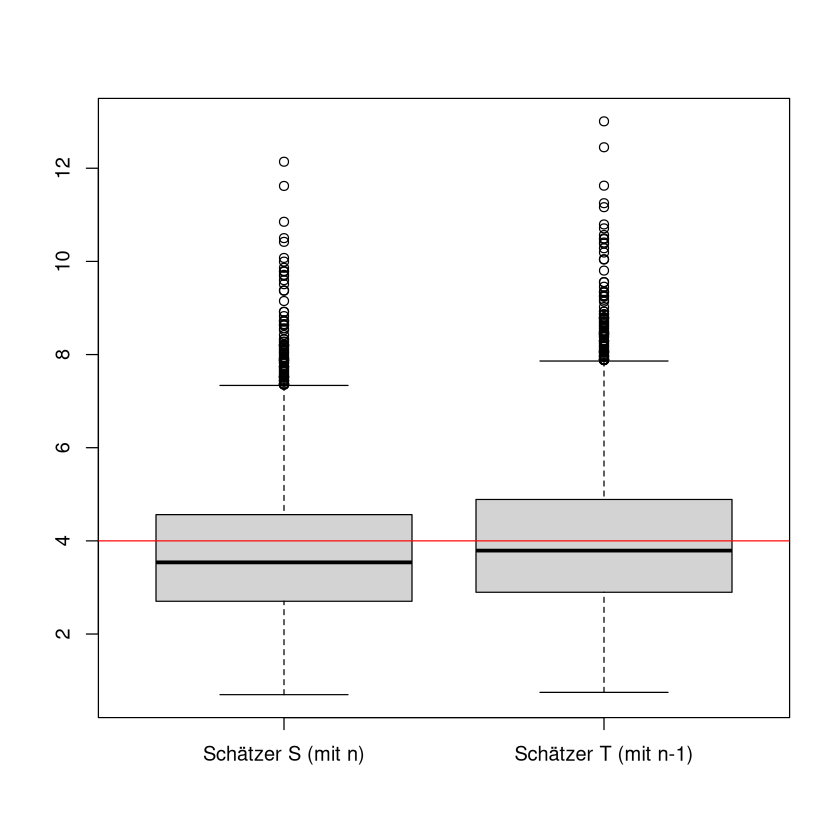

In [5]:
boxplot(est_n, est_n_1,names = c("Schätzer S (mit n)","Schätzer T (mit n-1)"))
abline(h=4, col="red")

Dies lässt sich auch im Histogramm verdeutlichen:

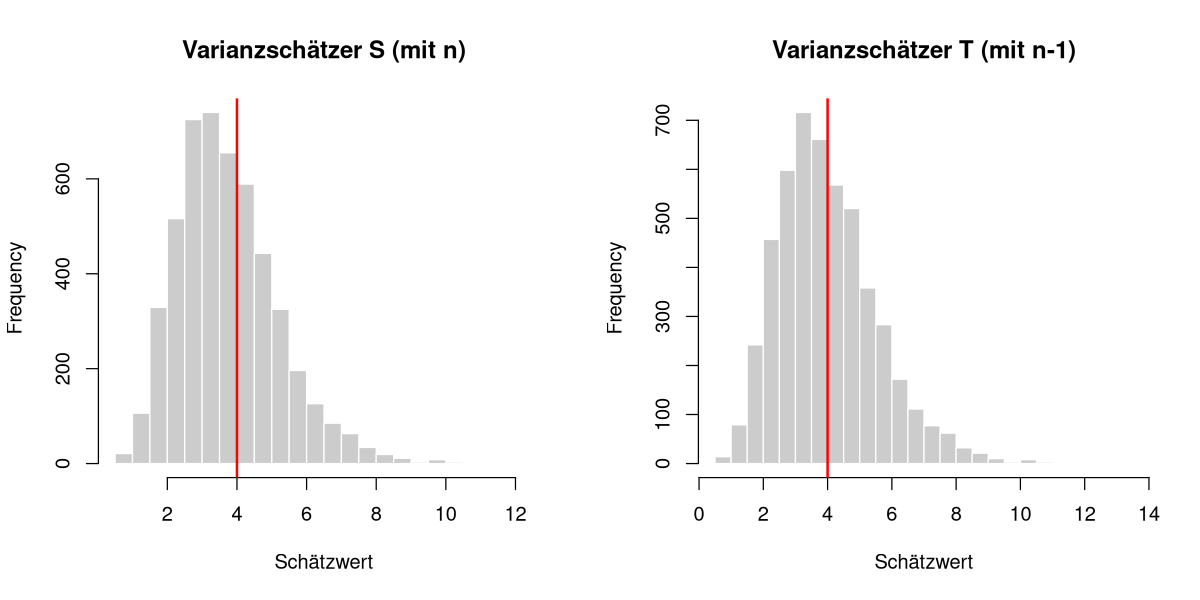

In [6]:
# Grafik-Parameter anpassen 
options(repr.plot.width = 10, repr.plot.height = 5)   # Grafik breiter und flacher (Standard ist 7 und 7)
par(mfrow = c(1, 2))                                  # zwei Plots nebeneinander 

hist(est_n, breaks = 30, main = "Varianzschätzer S (mit n)",
     xlab = "Schätzwert", col = "grey80", border = "white")
abline(v = sigma2_true, col = "red", lwd = 2)  # wahre Varianz

hist(est_n_1, breaks = 30, main = "Varianzschätzer T (mit n-1)",
     xlab = "Schätzwert", col = "grey80", border = "white")
abline(v = sigma2_true, col = "red", lwd = 2)  # wahre Varianz

# Grafik-Parameter auf Standardwerte zurücksetzen
par(mfrow = c(1, 1))
options(repr.plot.width = 7, repr.plot.height = 7)

